In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

In [6]:
#!pip install ydata-profiling

In [7]:
#Data Cleaning

In [8]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df, title="Profiling Report")

# Save the report to an HTML file
profile.to_file("report.html")

profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.shape

(13320, 9)

In [10]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [11]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [13]:
df.isnull().sum()



area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
df1 = df.dropna()

In [15]:
df1.isnull().sum()


area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [19]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
num_columns = df1.select_dtypes(include=['number']).columns
cat_columns = df1.select_dtypes(exclude=['number']).columns

In [21]:
num_columns

Index(['bath', 'balcony', 'price', 'BHK'], dtype='object')

In [22]:
cat_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming df1 is your DataFrame
selected_columns = ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price','BHK']

# Apply label encoding to categorical columns
le = LabelEncoder()
df_encoded = df1[selected_columns].apply(le.fit_transform)

# Calculate correlation matrix
corr_matrix = df_encoded.corr()


In [27]:
from sklearn.preprocessing import StandardScaler

# Standard scaling for numeric columns
scaler = StandardScaler()
df1[num_columns] = scaler.fit_transform(df1[num_columns])

# Now, df1 has all features transformed


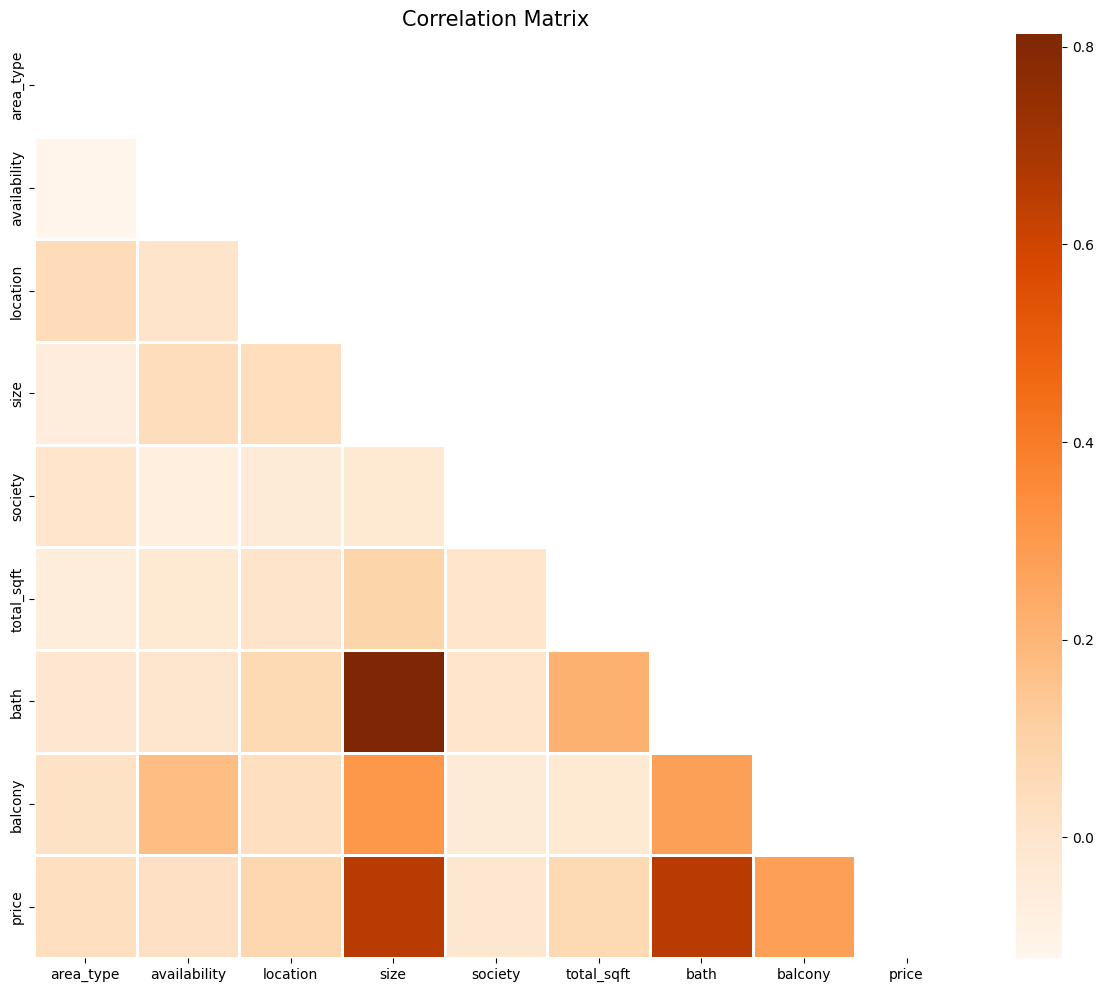

In [28]:

selected_columns = ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']

corr_matrix = df_encoded[selected_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='Oranges', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Correlation Matrix', fontsize=15)
plt.savefig("corr.png")

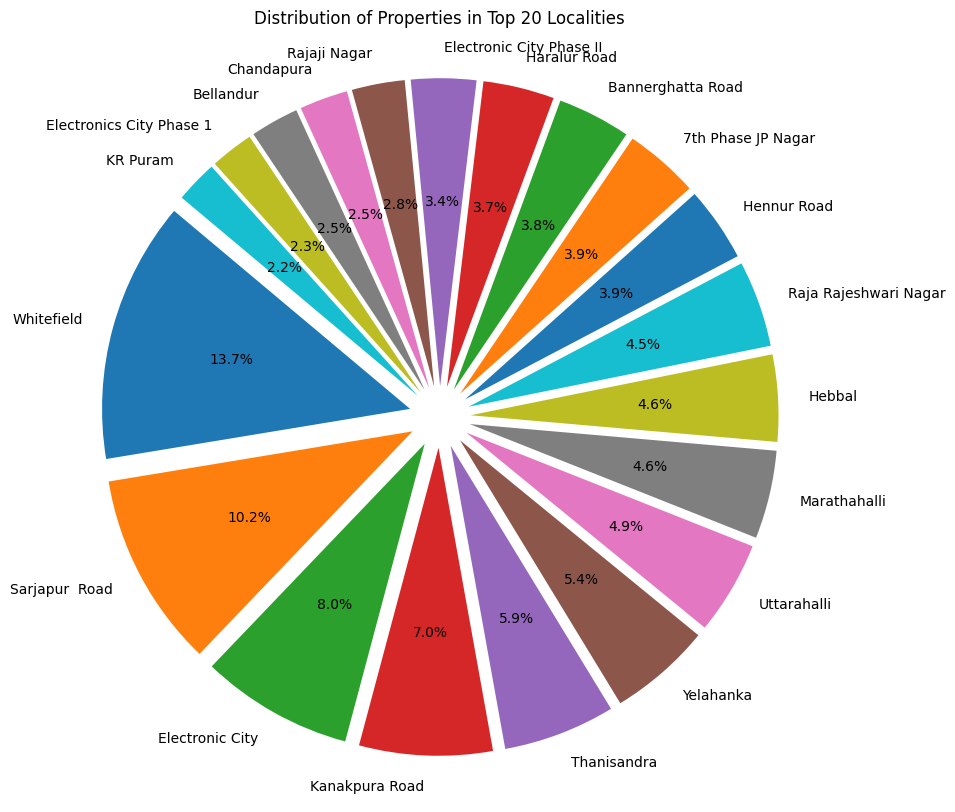

In [43]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
top_20_localities = df['location'].value_counts().nlargest(20)
explode = [0.1] * len(top_20_localities)  # Optional: explode the slices for better visibility

plt.figure(figsize=(10, 10))
plt.pie(top_20_localities, labels=top_20_localities.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Properties in Top 20 Localities')
plt.show()


In [33]:
# Convert 'total_sqft' to numeric, coercing errors to NaN for non-numeric values
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Drop rows with NaN values after conversion
df.dropna(subset=['total_sqft'], inplace=True)

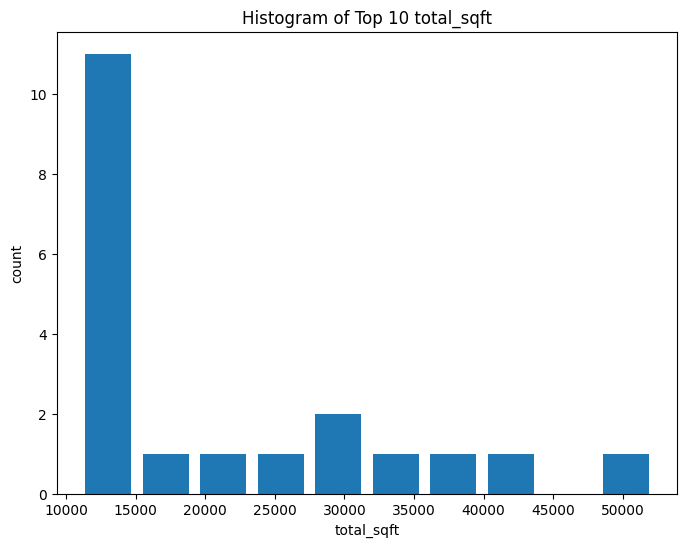

In [35]:
top_10_total_sqft = df['total_sqft'].nlargest(20)

plt.figure(figsize=(8, 6))
plt.hist(top_10_total_sqft, rwidth=0.8)
plt.xlabel("total_sqft")
plt.ylabel("count")
plt.title("Histogram of Top 10 total_sqft")
plt.show()


In [22]:
df.total_sqft.describe()

count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

In [23]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

<Axes: xlabel='area_type', ylabel='count'>

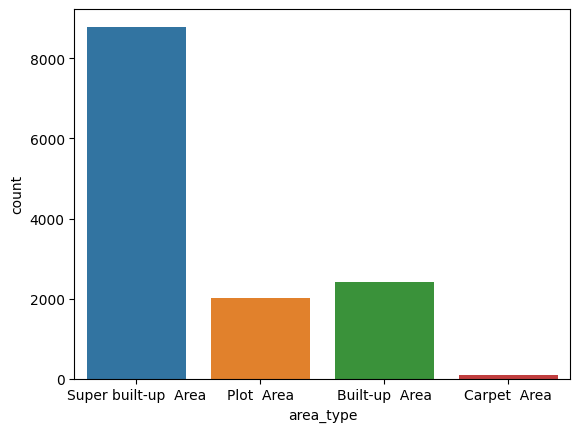

In [24]:
sns.countplot(data=df,x='area_type')

In [25]:
# Assuming df1 is your DataFrame
average_prices_by_area_type = df.groupby('area_type')['price'].mean()

print("Average prices by area type:")
print(average_prices_by_area_type)


Average prices by area type:
area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64


In [26]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [45]:
df['BHK'] = df['size'].str.extract('(\d+)').astype(float)


In [46]:
X = df1.drop('price', axis=1)  # Drop the 'price' column along the columns (axis=1)
y = df1['price']  # Select the 'price' column as the target variable


In [47]:
# Convert categorical features to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_categorical = X.select_dtypes(include=['object']).copy()
X_categorical = X_categorical.apply(lambda col: label_encoder.fit_transform(col))

In [48]:
# Combine numerical and encoded categorical features
X = pd.concat([X.select_dtypes(exclude=['object']), X_categorical], axis=1)


In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

mse_dict = {}

In [52]:
for kernel in kernels:
    # Initialize SVR model with the current kernel
    svm_regressor = SVR(kernel=kernel)
    
    # Train the SVR model
    svm_regressor.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    svm_pred = svm_regressor.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, svm_pred)
    
    # Store the MSE in the dictionary
    mse_dict[kernel] = mse
    
    print(f'Mean Squared Error for SVR with kernel {kernel}: {mse}')

Mean Squared Error for SVR with kernel linear: 0.6933953737795711
Mean Squared Error for SVR with kernel poly: 0.39546734493529895
Mean Squared Error for SVR with kernel rbf: 0.4602729585879368
Mean Squared Error for SVR with kernel sigmoid: 7735.996936678515


In [53]:
# Display MSE for each kernel
print('\nMSE for each kernel:')
for kernel, mse in mse_dict.items():
    print(f'{kernel}: {mse}')


MSE for each kernel:
linear: 0.6933953737795711
poly: 0.39546734493529895
rbf: 0.4602729585879368
sigmoid: 7735.996936678515
